In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
sns.set()

In [2]:
!head ../Data/Carseats.csv

"","Sales","CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"
"1",9.5,138,73,11,276,120,"Bad",42,17,"Yes","Yes"
"2",11.22,111,48,16,260,83,"Good",65,10,"Yes","Yes"
"3",10.06,113,35,10,269,80,"Medium",59,12,"Yes","Yes"
"4",7.4,117,100,4,466,97,"Medium",55,14,"Yes","Yes"
"5",4.15,141,64,3,340,128,"Bad",38,13,"Yes","No"
"6",10.81,124,113,13,501,72,"Bad",78,16,"No","Yes"
"7",6.63,115,105,0,45,108,"Medium",71,15,"Yes","No"
"8",11.85,136,81,15,425,120,"Good",67,10,"Yes","Yes"
"9",6.54,132,110,0,108,124,"Medium",76,10,"No","No"


In [3]:
carseats = pd.read_csv("../Data/Carseats.csv", index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Fit a multiple regression model to predict *Sales* using *Price*, *Urban* and *US*.

In [4]:
initial_model = sm.ols("Sales ~ Price + Urban + US", carseats)
initial_results = initial_model.fit()
initial_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2017-11-09 13:48 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0435    0.6510   20.0357  0.0000  11.7636  14.3233
Urban[T.Yes]  -0.0219    0.2717   -0.0807  0.9357  -0.5560   0.5121
US[T.Yes]      1.2006    0.2590    4.6347  0.0000   0.6913   1.7098
Price         -0.0545    0.0052  -10.3892  0.0000  -0.0648  -0.0442
------------------------------------------------------------------
Omnibus:               0.676        Durbin-Watson:           1.912
Prob(Omnibus):         0.713        Jarque-Bera (JB):        0.758
Skew:                  0.093        Prob(JB):                0.684
Kurtosis:              2.897        Condition No.:           628  
==================================================================

"""

*Urban* does not affect *Sales* significantly. *US* is statistically significant and increases sales by around 1.2. *Price* has a negative impact on *Sales*.

Sales is about 13 - 0.0545 * Price ( + 1.2 if US = Yes)

We can reject the null hypothesis for *US* and *Price*. We now fit a smaller model without *Urban*.

In [5]:
smaller_model = sm.ols("Sales ~ Price + US", carseats)
smaller_results = smaller_model.fit()
smaller_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.235    
Dependent Variable: Sales            AIC:                1861.3186
Date:               2017-11-09 13:48 BIC:                1873.2930
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           2                F-statistic:        62.43    
Df Residuals:       397              Prob (F-statistic): 2.66e-24 
R-squared:          0.239            Scale:              6.0979   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0308    0.6310   20.6518  0.0000  11.7903  14.2713
US[T.Yes]      1.1996    0.2585    4.6415  0.0000   0.6915   1.7078
Price         -0.0545    0.0052  -10.4161  0.0000  -0.0648  -0.0442
------------------------------------------------------------------
Omnibus:               0.666        Durbin-Watson:           1.912
Prob(Omnibus):         0.717        Jarque-Bera (JB):        0.749
Skew:                  0.092        Prob(JB):                0.688
Kurtosis:              2.895        Condition No.:           607  
==================================================================

"""

The smaller model fits the data just as well as the initial model, both have a R-squared of 0.239.

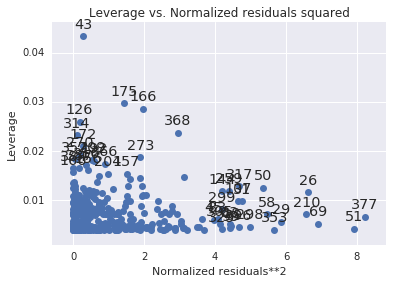

In [6]:
plot_leverage_resid2(smaller_results);

The average leverage is (p + 1) / n = (2 + 1) / 400

In [7]:
print((2 + 1) / 400)

0.0075


In [8]:
carseats.loc[43]

Sales           10.43
CompPrice          77
Income             69
Advertising         0
Population         25
Price              24
ShelveLoc      Medium
Age                50
Education          18
Urban             Yes
US                 No
Name: 43, dtype: object

Observation 43 has high leverage because it has a very low *Price* compared with the other observations.

In [9]:
carseats.sort_values('Price').head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
43,10.43,77,69,0,25,24,Medium,50,18,Yes,No
126,9.34,89,78,0,181,49,Medium,43,15,No,No
368,14.37,95,106,0,256,53,Good,52,17,Yes,No
314,9.33,103,81,3,491,54,Medium,66,13,Yes,No
172,12.49,93,106,12,416,55,Medium,75,15,Yes,Yes


Observations 51 and 377 have high normalized residuals.

In [10]:
carseats.loc[[51,377]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
51,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes
377,16.27,141,60,19,319,92,Good,44,11,Yes,Yes
